<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/taca/blob/main/ref/geron/chap_2/3_Get_Data/2_vistazo_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/taca/blob/main/ref/geron/chap_2/3_Get_Data/2_vistazo_datos.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Echemos un vistazo rápido a la estructura de los datos

Cada fila representa un distrito.

Hay 10 atributos (puedes ver los primeros 9 en la captura de pantalla):

* `longitude`, 
* `latitude`, 
* `housing_median_age`, 
* `total_rooms`, 
* total_bedrooms,
* population, 
* households, 
* median_income, 
* median_house_value, y 
* `ocean_proximity`.

In [9]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Hay 20,640 instancias en el conjunto de datos, 
* lo que significa que es bastante pequeño para los estándares de Machine Learning, 
* pero es perfecto para comenzar.

* Observe que el atributo `total_bedrooms` tiene solo 20,433 valores no nulos, 
* lo que significa que 207 distritos carecen de esta característica.

Tendremos que ocuparnos de esto más tarde.

Todos los atributos son numéricos, excepto el campo `ocean_proximity`.

Su tipo es `object`, por lo que podría contener cualquier tipo de objeto Python.

Pero como cargó estos datos desde un archivo CSV, sabe que debe ser un atributo de texto.

Cuando miró las cinco filas superiores, probablemente notó que los valores en la columna `ocean_proximity` eran repetitivos, lo que significa que probablemente sea un atributo categórico.

Puede averiguar 
* qué subcategorías existen y   
* cuántos distritos pertenecen a cada categoría utilizando el método `value_counts()`:

In [10]:
housing['ocean_proximity'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Veamos los otros campos.

El método `describe()` muestra un resumen de los atributos numéricos.

In [11]:
housing.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Las filas de 

* recuento (`count`), 
* media (`mean`),   
* mínima (`min`) y   
* máxima (`max`)  

se explican por sí mismas.

Tenga en cuenta que los valores nulos se ignoran (por ejemplo, el recuento de `total_bedrooms` es 20,433, no 20.640).

La fila `std` muestra la desviación estándar, que mide qué tan dispersos están los valores.

Las filas $25\%$, $50\%$ y $75\%$ muestran los percentiles correspondientes: 
* un percentil indica el valor por debajo del cual cae un porcentaje determinado de observaciones en 
  un grupo de observaciones.

Por ejemplo,   
* el $25\%$ de los distritos tiene una `housing_median_age` inferior a 18,   
* mientras que el $50\%$ es inferior a 29 y   
* el $75\%$ es inferior a 37. 

Estos a menudo se denominan:   

* percentil 25 (o primer cuartil),   
* mediana y   
* percentil 75 (o tercer cuartil).

Otra forma rápida de tener una idea del tipo de datos con los que está tratando es trazar un histograma para cada atributo numérico. 

Un histograma muestra el número de instancias (en el eje vertical) que tienen un rango de valores dado (en el eje horizontal).

Puede trazar este atributo a la vez, o puede llamar al método `hist()` en todo el conjunto de datos (como se muestra en el siguiente ejemplo de código), y trazará un histograma para cada atributo numérico:

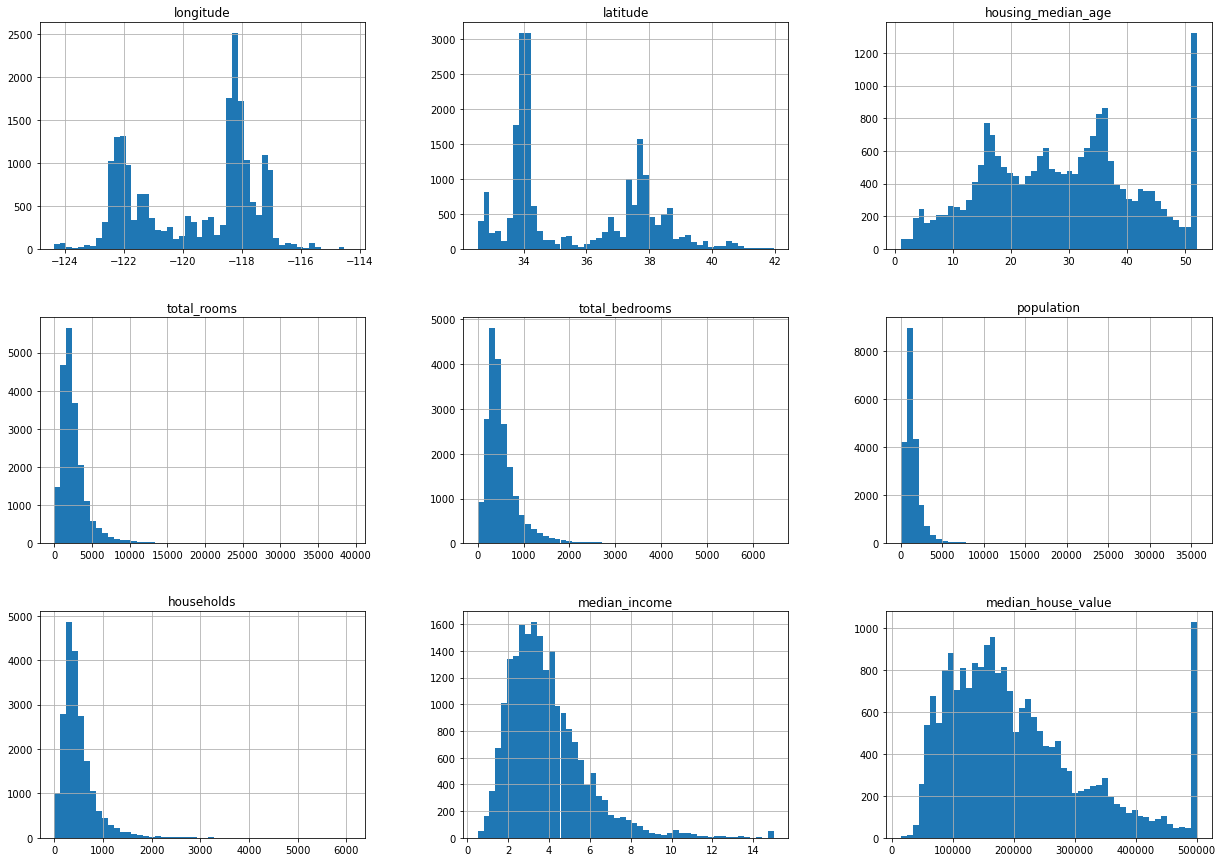

In [9]:
%matplotlib inline   

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(21,15)) 

plt.savefig('metodo_hist_de_pandas.jpg') 

plt.show()

### NOTA

El método `hist()` se basa en Matplotlib, que a su vez se basa en un backend gráfico especificado por el usuario para dibujar en su pantalla.

Entonces, antes de que pueda trazar cualquier cosa, debe especificar qué backend debe usar Matplotlib.

La opción más simple es usar el comando mágico de Jupyter `%matplotlib inline`. 

Esto le dice a Jupyter que configure Matplotlib para que use el propio backend de Jupyter. 

A continuación, los gráficos se renderizan dentro del propio cuaderno.

Tenga en cuenta que llamar a `show()` es opcional en un cuaderno de Jupyter, ya que Jupyter mostrará automáticamente los gráficos cuando se ejecute una celda.

Hay algunas cosas que puede notar en estos histogramas:

1. Primero, el atributo de `median_income`(ingreso mediano) no parece estar expresado en dólares estadounidenses (USD).

   Después de consultar con el equipo que recopiló los datos, se le informa que los datos se han escalado y limitado a   
   15 (en realidad, 15.0001) para los ingresos medios más altos, y a 0,5 (en realidad, 0,4999) para los ingresos medios   
   más bajos.

   Los números representan aproximadamente decenas de miles de dólares (por ejemplo, 3 en realidad significa alrededor de  
   $\$ 30,000 $).

   Trabajar con atributos preprocesados es común en Machine Learning y no es necesariamente un problema, pero debe intentar  
   comprender cómo se calcularon los datos.

2. También se limitaron `housing_median_age` (la edad media de la vivienda y `housing_median_value` (el valor medio de la vivienda).

   Este último puede ser un problema grave ya que es su atributo de destino (sus etiquetas).

   Sus algoritmos de aprendizaje automático pueden aprender que los precios nunca vayan más allá de ese límite.

   Debe consultar con su equipo cliente (el equipo que utilizará la salida de su sistema) para ver si esto es un problema o no.

   Si le dicen que necesitan predicciones precisas incluso más allá de $\$500,000$, entonces tiene dos opciones:

   1. Reúna las etiquetas adecuadas para los distritos cuyas etiquetas fueron tapadas.

   2. Elimine esos distritos del conjunto de entrenamiento (`train_set`) (y también del conjunto de prueba (`test_set`), ya que su sistema no 
      debe evaluarse mal si predice valores superiores a $ 500 000).

3. Estos atributos tienen escalas muy diferentes.

   Discutiremos esto más adelante en este capítulo, cuando exploremos el escalado de características.

4. Por último, muchos histogramas tienen una gran cola: se extienden mucho más a la derecha de la mediana que a la izquierda.

Esto puede hacer que sea un poco más difícil para algunos algoritmos de aprendizaje automático detectar patrones.

Intentaremos transformar estos atributos más adelante para tener más distribuciones en forma de campana.

Es de esperar que ahora comprenda mejor el tipo de datos que está tratando.

### ADVERTENCIA

¡Esperar! Antes de seguir analizando los datos, debe crear un conjunto de prueba, dejarlo a un lado y no mirarlo nunca.

# Create a Test Set


## Métodos y atributos importantes en este caso

1. 

## Referentes  

* Géron, Aurélien, Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems, (2019), O'Reilly Media.